In [57]:
import tensorflow as tf
import numpy as np
import math
import pandas as pd
from tensorflow.keras import layers
from tinymlgen import port
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
import seaborn as sns
from keras import regularizers
from tensorflow.keras import initializers

In [2]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, LSTM, GRU, Lambda, RepeatVector, Dense, TimeDistributed, RepeatVector, MultiHeadAttention # for creating layers inside the Neural Network
import time

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import StandardScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.10.0
pandas: 1.4.4
numpy: 1.21.5
sklearn: 1.2.2
plotly: 5.9.0


In [3]:
from tensorflow.keras.layers import GaussianDropout, GaussianNoise, Lambda

In [4]:
df = pd.read_csv('2018-2023-FULL.csv')
df

,timestamp,Power (t),Jam,Hari,Bulan,Jam_Kerja,Libur,Power (t-1),Power (t-2),Power (t-3),Power (d-1),Power (d-2),Power (m-1),Power (m-2),Aoi,Jam_kosinus,Jam_sinus,Elevation
0,2018-01-01 00:00:00,2.000000,0,1,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.996018,1.000000,0.000000,-60.003018
1,2018-01-01 01:00:00,2.000000,1,1,1,0,0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.068173,0.965960,0.258691,-55.835119
2,2018-01-01 02:00:00,2.000000,2,1,1,0,0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.928387,0.866158,0.499770,-46.823769
3,2018-01-01 03:00:00,2.000000,3,1,1,0,0,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,131.042354,0.707388,0.706825,-35.325213
4,2018-01-01 04:00:00,2.000000,4,1,1,0,0,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,117.525260,0.500460,0.865760,-22.618895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,2023-12-13 06:00:02,3.833131,6,3,12,0,0,2.035126,4.625954,3.154176,4.861267,6.199815,2.356411,5.076737,87.674722,0.000796,1.000000,6.500975
25831,2023-12-13 07:00:02,36.335046,7,3,12,1,0,3.833131,2.035126,4.625954,50.986043,41.423812,24.774151,51.512613,74.124751,-0.257922,0.966166,20.280435
25832,2023-12-13 08:00:01,62.009425,8,3,12,1,0,36.335046,3.833131,2.035126,57.464486,62.170591,59.962064,55.521662,60.847184,-0.499080,0.866556,34.028063
25833,2023-12-13 09:00:02,65.843360,9,3,12,1,0,62.009425,36.335046,3.833131,69.448611,74.560755,68.814442,56.200218,48.252281,-0.706262,0.707951,47.532952


In [5]:
df.corr()

,Power (t),Jam,Hari,Bulan,Jam_Kerja,Libur,Power (t-1),Power (t-2),Power (t-3),Power (d-1),Power (d-2),Power (m-1),Power (m-2),Aoi,Jam_kosinus,Jam_sinus,Elevation
Power (t),1.000000,0.046828,-0.263473,0.024823,0.598211,-0.160693,0.909289,0.768947,0.606412,0.641430,0.475027,0.773378,0.746005,-0.647050,-0.652953,0.003723,0.649654
Jam,0.046828,1.000000,0.000262,-0.000655,0.144664,0.062733,0.135713,0.223930,0.310840,0.046798,0.046758,0.046644,0.046706,-0.074893,-0.103700,-0.776316,0.075447
Hari,-0.263473,0.000262,1.000000,0.003866,0.000096,0.476530,-0.263314,-0.263101,-0.262837,0.021409,0.218366,-0.259641,-0.255846,-0.000185,-0.000108,-0.000198,-0.000047
Bulan,0.024823,-0.000655,0.003866,1.000000,-0.000190,-0.016774,0.024710,0.024598,0.024494,0.028417,0.031225,0.051175,0.070737,0.003739,0.000177,0.000657,0.005635
Jam_Kerja,0.598211,0.144664,0.000096,-0.000190,1.000000,0.433113,0.586452,0.549428,0.476264,0.597602,0.597055,0.595366,0.592020,-0.862699,-0.895319,-0.116508,0.861675
Libur,-0.160693,0.062733,0.476530,-0.016774,0.433113,1.000000,-0.161547,-0.164344,-0.170398,0.148787,0.381538,-0.092676,-0.086113,-0.374290,-0.387784,-0.050621,0.371669
Power (t-1),0.909289,0.135713,-0.263314,0.024710,0.586452,-0.161547,1.000000,0.909286,0.768939,0.602593,0.441522,0.732904,0.708571,-0.616541,-0.631676,-0.165365,0.619342
Power (t-2),0.768947,0.223930,-0.263101,0.024598,0.549428,-0.164344,0.909286,1.000000,0.909283,0.513910,0.366807,0.632320,0.613874,-0.546483,-0.567358,-0.323196,0.549340
Power (t-3),0.606412,0.310840,-0.262837,0.024494,0.476264,-0.170398,0.768939,0.909283,1.000000,0.395986,0.266300,0.500310,0.487158,-0.439959,-0.464380,-0.459022,0.442896
Power (d-1),0.641430,0.046798,0.021409,0.028417,0.597602,0.148787,0.602593,0.513910,0.395986,1.000000,0.641339,0.585313,0.568254,-0.646384,-0.652304,0.003686,0.648907


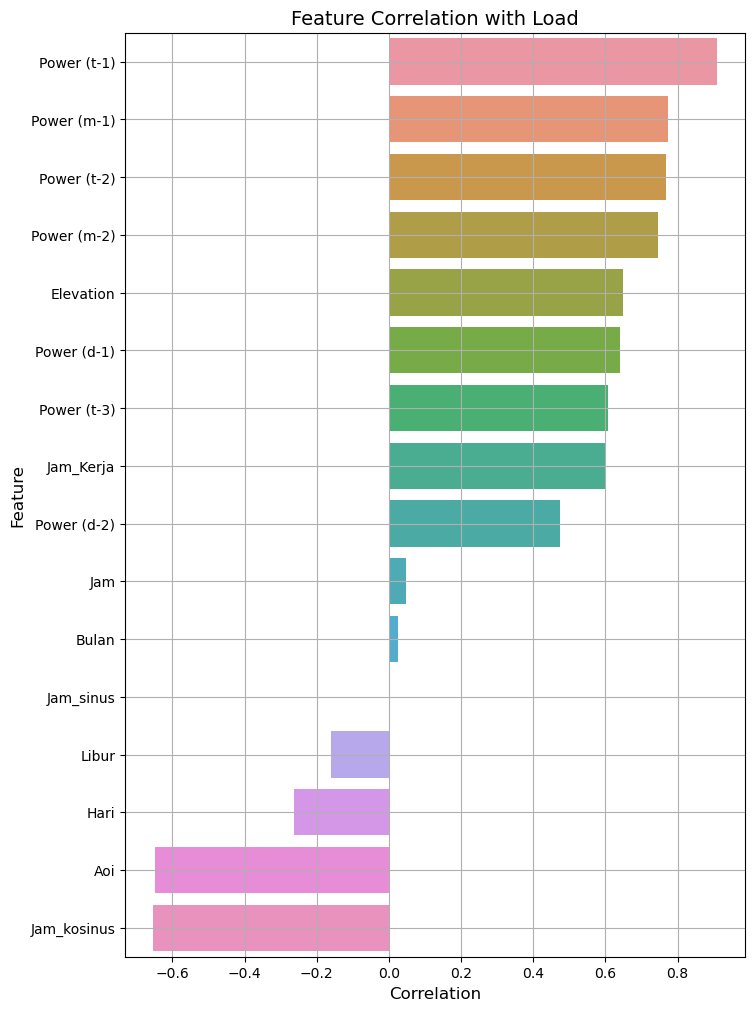

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix with Pearson Correlation
corr_matrix = df.corr()

# Filter and sort the correlation values for the target variable "Load"
target_correlation = corr_matrix['Power (t)'].drop('Power (t)').sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(8, 12))

# Create a bar plot of the correlation values
sns.barplot(x=target_correlation.values, y=target_correlation.index)

# Set labels and title with adjusted font size
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Correlation with Load', fontsize=14)

# Show gridlines
plt.grid(True)

# Show the plot
plt.show()


In [7]:
X=df[['Jam','Aoi','Elevation','Power (m-2)','Jam_kosinus','Power (d-1)','Power (t-3)','Power (m-1)','Power (t-1)','Hari','Power (t-2)','Libur']]

In [8]:
y=df['Power (t)'].values

In [9]:
#Data Normalization
std=StandardScaler()
X_std=std.fit_transform(X)

In [10]:
train_size=int(0.7*len(X_std))
test_size=int(0.9*len(X_std))
X_train=X_std[:train_size]
X_val=X_std[train_size:test_size]
X_test=X_std[test_size:]

X_train=X_train.reshape(-1,1,12)
X_val=X_val.reshape(-1,1,12)
X_test=X_test.reshape(-1,1,12)

y_train=y[:train_size]
y_val=y[train_size:test_size]
y_test=y[test_size:]

y_train=y_train.reshape(-1,1,1)
y_val=y_val.reshape(-1,1,1)
y_test=y_test.reshape(-1,1,1)

In [11]:
print("Panjang data training:", len(X_train))
print("Panjang data validasi:", len(X_val))
print("Panjang data testing:", len(X_test))

Panjang data training: 18084
Panjang data validasi: 5167
Panjang data testing: 2584


In [51]:
# Custom function for quantization noise
def quantization_noise(x, num_bits=8):
    # Scale the values to the range [0, 2^num_bits - 1]
    scale = 2**num_bits - 1
    x_quantized = tf.round(x * scale) / scale
    return x_quantized

In [17]:
# Define the sampling layer for the VAE
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, RepeatVector, LSTM, TimeDistributed, Dense, Lambda
from tensorflow.keras import backend as K

# Define the sampling layer for the VAE
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]), name='Input-Layer')
encoder_gru = GRU(units=64, activation='relu', return_sequences=False, name='Hidden-GRU-Encoder-Layer-1')(inputs)

# Define mean and log variance layers
z_mean = Dense(units=32, activation='linear', name='Z-Mean')(encoder_gru)
z_log_var = Dense(units=32, activation='linear', name='Z-Log-Variance')(encoder_gru)

# Sample from the distribution
z = Lambda(sampling, output_shape=(32,), name='Sampling')([z_mean, z_log_var])

# Decoder
decoder_repeat = RepeatVector(X_train.shape[1], name='Repeat-Vector-Layer')(z)
decoder_lstm = LSTM(units=32, activation='relu', return_sequences=True, name='Hidden-LSTM-Decoder-Layer-2')(decoder_repeat)
decoder_output = TimeDistributed(Dense(units=1, activation='linear', name='Output-Layer-1'))(decoder_lstm)

# Instantiate the VAE model
vae = Model(inputs, decoder_output, name='VAE')

# Define the VAE loss
xent_loss = K.mean(K.square(inputs - decoder_output), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = xent_loss + kl_loss

# Compile the model
vae.add_loss(vae_loss)
vae.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mae')  # No specific loss needed

# Display the model summary
vae.summary()

# Assuming X_train and y_train are your training data
history = vae.fit(
    X_train,  # Input data
    y_train,  # Target data (self-supervised learning)
    epochs=150,
    batch_size=100,
    verbose=1,
    validation_data=(X_val, y_val),  # Assuming X_val is your validation data
)


Model: "VAE"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Layer (InputLayer)       [(None, 1, 12)]      0           []                               
                                                                                                  
 Hidden-GRU-Encoder-Layer-1 (GR  (None, 64)          14976       ['Input-Layer[0][0]']            
 U)                                                                                               
                                                                                                  
 Z-Mean (Dense)                 (None, 32)           2080        ['Hidden-GRU-Encoder-Layer-1[0][0
                                                                 ]']                              
                                                                                                

ValueError: in user code:

    File "C:\Users\INA\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\INA\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\INA\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\INA\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\INA\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\INA\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 316, in __call__
        total_total_loss_mean_value = tf.add_n(total_loss_mean_values)

    ValueError: Shapes must be equal rank, but are 0 and 2
    	From merging shape 0 with other shapes. for '{{node AddN}} = AddN[N=2, T=DT_FLOAT](mean_absolute_error/weighted_loss/value, VAE/tf.__operators__.add_19/AddV2)' with input shapes: [], [?,?].


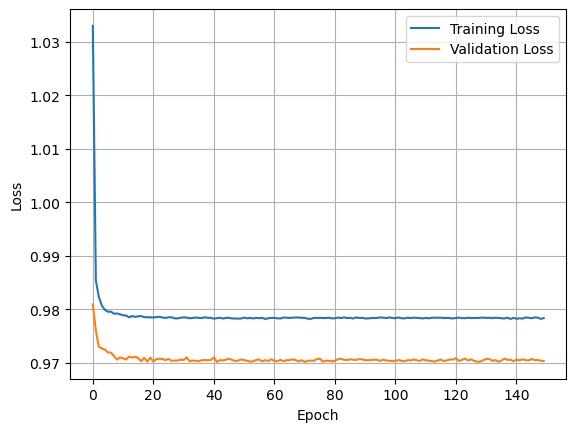

In [52]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and a legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Show the plot
plt.show()


In [53]:
y_pred=vae.predict(X_test)

81/81 [==============================] - 1s 5ms/step


In [54]:
len(y_pred.reshape(-1))

2584

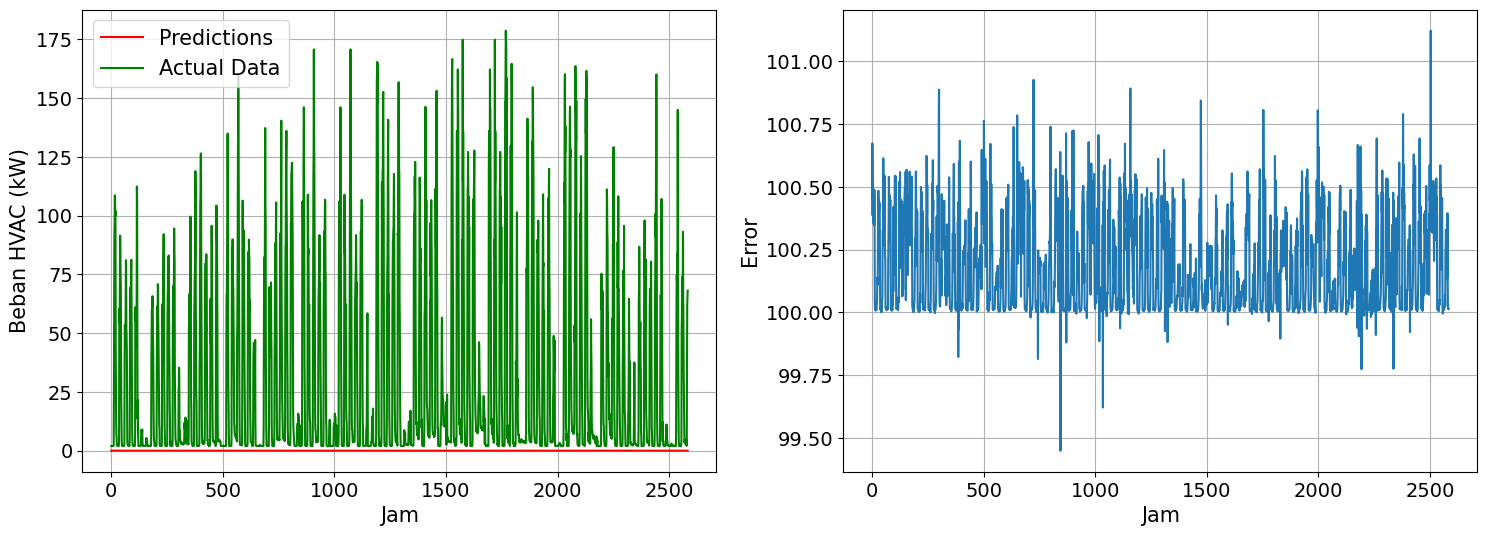

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
abs_error = np.abs((y_pred.reshape(-1) - y_test.reshape(-1))/y_test.reshape(-1)*100)
#abs_error = np.abs(y_pred.reshape(-1) - y_test.reshape(-1))
#abs_error = (y_pred.reshape(-1) - y_test.reshape(-1))

ax[0].plot(range(len(y_test.reshape(-1))), y_pred.reshape(-1), label='Predictions', color='red')
ax[0].plot(range(len(y_test.reshape(-1))), y_test.reshape(-1), label='Actual Data', color='green')
ax[0].set_xlabel('Jam', fontsize=15)
ax[0].set_ylabel('Beban HVAC (kW)', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].grid()

ax[1].plot(range(len(y_test.reshape(-1))), abs_error)
ax[1].set_xlabel('Jam', fontsize=15)
ax[1].set_ylabel('Error', fontsize=15)
ax[1].grid()


# Adjust the font size of the tick labels on the x-axis and y-axis
ax[0].tick_params(axis='both', labelsize=14)
ax[1].tick_params(axis='both', labelsize=14)

# Show the plot

plt.show()


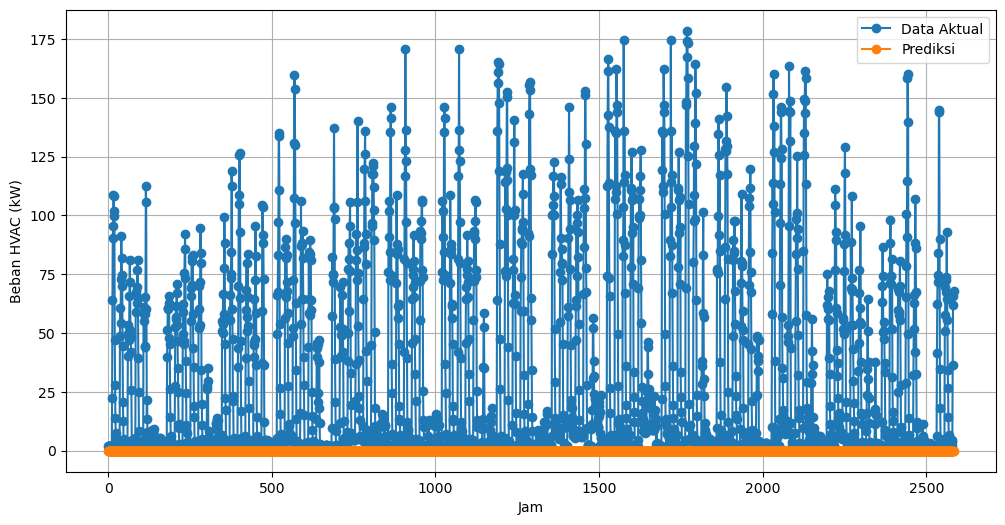

In [34]:
import matplotlib.pyplot as plt

# Flatten the arrays for plotting
nn_predictions_test_flat = y_pred.flatten()
#final_predictions_test_flat = final_predictions.flatten()
y_test_flat = y_test.flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label='Data Aktual', marker='o')
plt.plot(nn_predictions_test_flat, label='Prediksi', marker='o')
plt.xlabel('Jam')
plt.ylabel('Beban HVAC (kW)')
#plt.title('Predictions vs Actual Data')
plt.legend()
plt.grid()
#plt.xlim(100, 300)
#plt.ylim(0, 120)

plt.show()


In [35]:
y_pred_all=vae.predict(X_std.reshape(-1,1,12)).reshape(-1)

808/808 [==============================] - 4s 4ms/step


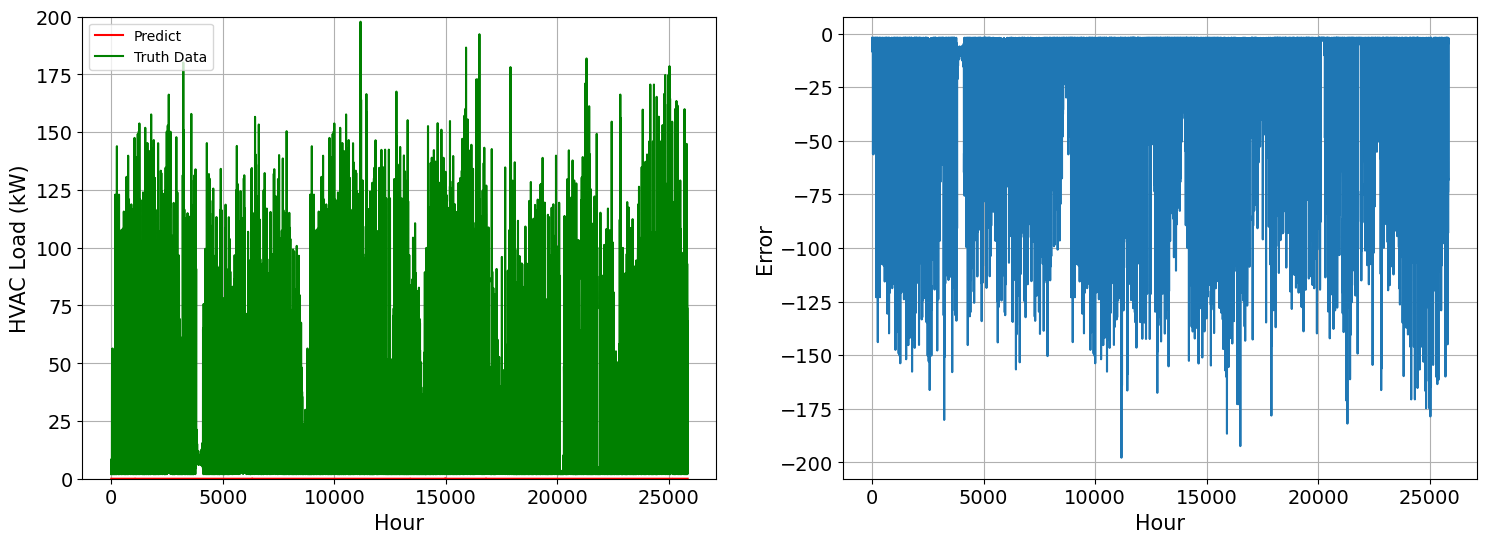

In [36]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
#error_all=np.abs(((y_pred_all-y)/y)*100)
#error_all=np.abs(y_pred_all-y)
#error_all=(y_pred_all-y)*(y_pred_all-y)
error_all=(y_pred_all-y)

#ax[0].scatter(range(len(X_std)),y_pred_all,label='Predict',marker='.',color='red')
#ax[0].scatter(range(len(X_std)),y,label='Truth Data',ls='--',color='green')

# Set the fixed range for the y-axis values
fixed_y_range_0 = (0, 200)  # Define your desired y-axis range here

# Set the fixed range for the y-axis values
fixed_y_range_1 = (-60, 60)  # Define your desired y-axis range here

ax[0].plot(range(len(X_std)), y_pred_all, label='Predict', color='red')
ax[0].plot(range(len(X_std)), y, label='Truth Data', color='green')

ax[0].set_xlabel('Hour', fontsize=15)
ax[0].set_ylabel('HVAC Load (kW)',fontsize=15)
ax[0].legend(loc='upper left',fontsize=10)
ax[0].grid()
# Set the y-axis range for the second subplot
ax[0].set_ylim(fixed_y_range_0)


ax[1].plot(range(len(X)),error_all)
ax[1].set_xlabel('Hour', fontsize=15)
ax[1].set_ylabel('Error', fontsize=15)
ax[1].grid()
# Set the y-axis range for the second subplot
#ax[1].set_ylim(fixed_y_range_1)

# Adjust the font size of the tick labels on the x-axis and y-axis
ax[0].tick_params(axis='both', labelsize=14)
ax[1].tick_params(axis='both', labelsize=14)


In [37]:
print('mse:',np.mean((y_pred_all-y)**2))
print('mae:',np.mean(abs_error))

mse: 1777.6893477571723
mae: 100.17471902234998


In [38]:
import statistics
import numpy
from math import sqrt

def mape(y, y_pred_all): 
    y, y_pred_all = np.array(y), np.array(y_pred_all)
    return np.mean(np.abs((y - y_pred_all) / y)) * 100
print('MAPE :',mape(y, y_pred_all) )

RMSE=sqrt(mean_squared_error(y,y_pred_all))
print('RMSE :',RMSE)

Avg = statistics.mean(y)
print("Mean :", Avg)

corr_matrix = numpy.corrcoef(y,y_pred_all)
corr = corr_matrix[0,1]
R_sq = corr**2

print("R2 :", R_sq)

CVRMSE = ((RMSE/Avg)*100)
print("CV-RMSE :", CVRMSE)

MBE = np.mean(y-y_pred_all) #here we calculate MBE
print("MBE :", MBE)

NMBE = ((MBE/Avg)*100)
print("NMBE :", NMBE)

VP = sqrt(np.mean((y_pred_all)**2))
#print('VP :', VP)

VA = sqrt(np.mean((y)**2))
#print('VA :', VA)

IC = (RMSE/(VP+VA))
print('Inequality Coefficient :', IC)

MAPE : 100.19123354061847
RMSE : 42.16265347149266
Mean : 24.106744397994966
R2 : 6.690169871703733e-05
CV-RMSE : 174.8998237812629
MBE : 24.114500626796257
NMBE : 100.03217451794086
Inequality Coefficient : 0.9999164541606946


In [161]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y, y_pred_all, squared=True)
print("RMSLE :", rmsle)

RMSLE : 0.17230250436349567


In [162]:
print("Execution time:", execution_time, "seconds")

Execution time: 131.99467730522156 seconds


In [163]:
mean_percentage_abs_error = np.mean(abs((y_pred.reshape(-1) - y_test.reshape(-1))/y_test.reshape(-1)))*100
print("MAPE Testing:", mean_percentage_abs_error)

Avg_test = statistics.mean(y_test.reshape(-1))
print("Mean Testing:", Avg_test)

corr_matrix_test = numpy.corrcoef(y_test.reshape(-1),y_pred.reshape(-1))
corr_test = corr_matrix_test[0,1]
R_sq_test = corr_test**2
print("R2 Testing:", R_sq_test)

RMSE_test=sqrt(mean_squared_error(y_test.reshape(-1),y_pred.reshape(-1)))
print('RMSE Testing:',RMSE_test)

CVRMSE_test = ((RMSE_test/Avg_test)*100)
print('CVRMSE Testing:', CVRMSE_test)

MBE_test = np.mean(y_test-y_pred) #here we calculate MBE
print("MBE Testing:", MBE_test)

NMBE_test = ((MBE_test/Avg_test)*100)
print("NMBE Testing:", NMBE_test)

VP_test = sqrt(np.mean((y_pred)**2))
#print('VP :', VP)

VA_test = sqrt(np.mean((y_test)**2))
#print('VA :', VA)

IC_test = (RMSE_test/(VP_test+VA_test))
print('Inequality Coefficient Testing:', IC_test)

MAPE Testing: 54.55392466805431
Mean Testing: 30.00919914781361
R2 Testing: 0.8922535006774419
RMSE Testing: 13.480424574387676
CVRMSE Testing: 44.92097409193882
MBE Testing: 0.8712299161711746
NMBE Testing: 2.903209485464227
Inequality Coefficient Testing: 0.13742634751889554


In [164]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test.reshape(-1), y_pred.reshape(-1), squared=True)
print("RMSLE Testing:", rmsle)

RMSLE Testing: 0.2173622757005575


In [108]:
#Save

In [227]:
# Save the final model using TensorFlow's SavedModel format
model.save('gauss_quant_gru_lstm_model')

INFO:tensorflow:Assets written to: gauss_quant_gru_lstm_model\assets


INFO:tensorflow:Assets written to: gauss_quant_gru_lstm_model\assets
